<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_12_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA.


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Check missing values in critial columns
df[["Employment", "JobSat", "RemoteWork"]].isna().sum()

,0
Employment,0
JobSat,36311
RemoteWork,10631


In [4]:
# For each column, calculate the mode and store it
employment_mode = df["Employment"].mode()[0]
jobsat_mode = df["JobSat"].mode()[0]
remote_mode = df["RemoteWork"].mode()[0]

employment_mode, jobsat_mode, remote_mode

('Employed, full-time',
 np.float64(8.0),
 'Hybrid (some remote, some in-person)')

In [5]:
# Fill missing values
df["Employment"] = df["Employment"].fillna(employment_mode)
df["JobSat"] = df["JobSat"].fillna(jobsat_mode)
df["RemoteWork"] = df["RemoteWork"].fillna(remote_mode)

In [6]:
# Verify if missing data
df[["Employment", "JobSat", "RemoteWork"]].isna().sum()

,0
Employment,0
JobSat,0
RemoteWork,0


In [7]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,65437.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,7.525987
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,1.490331
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,8.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,8.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [8]:
df["Employment"].value_counts()

,count
Employment,
"Employed, full-time",39041
"Independent contractor, freelancer, or self-employed",4846
"Student, full-time",4709
"Employed, full-time;Independent contractor, freelancer, or self-employed",3557
"Not employed, but looking for work",2341
...,...
"Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time",1
"Student, full-time;Retired",1
"Employed, full-time;Not employed, but looking for work;Student, part-time",1


In [9]:
df["JobSat"].value_counts()

,count
JobSat,
8.0,43820
7.0,6379
6.0,3751
9.0,3626
10.0,2251
5.0,1956
3.0,1165
4.0,1130
2.0,772


In [10]:
df["RemoteWork"].value_counts()

,count
RemoteWork,
"Hybrid (some remote, some in-person)",33646
Remote,20831
In-person,10960


In [11]:
df["Employment"].value_counts(normalize=True) * 100

,proportion
Employment,
"Employed, full-time",59.661965
"Independent contractor, freelancer, or self-employed",7.405596
"Student, full-time",7.196235
"Employed, full-time;Independent contractor, freelancer, or self-employed",5.435763
"Not employed, but looking for work",3.577487
...,...
"Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time",0.001528
"Student, full-time;Retired",0.001528
"Employed, full-time;Not employed, but looking for work;Student, part-time",0.001528


In [12]:
df["JobSat"].value_counts(normalize=True) * 100

,proportion
JobSat,
8.0,66.965173
7.0,9.748308
6.0,5.732231
9.0,5.541208
10.0,3.439950
5.0,2.989135
3.0,1.780338
4.0,1.726852
2.0,1.179761


In [13]:
df["RemoteWork"].value_counts(normalize=True) * 100

,proportion
RemoteWork,
"Hybrid (some remote, some in-person)",51.417394
Remote,31.833672
In-person,16.748934


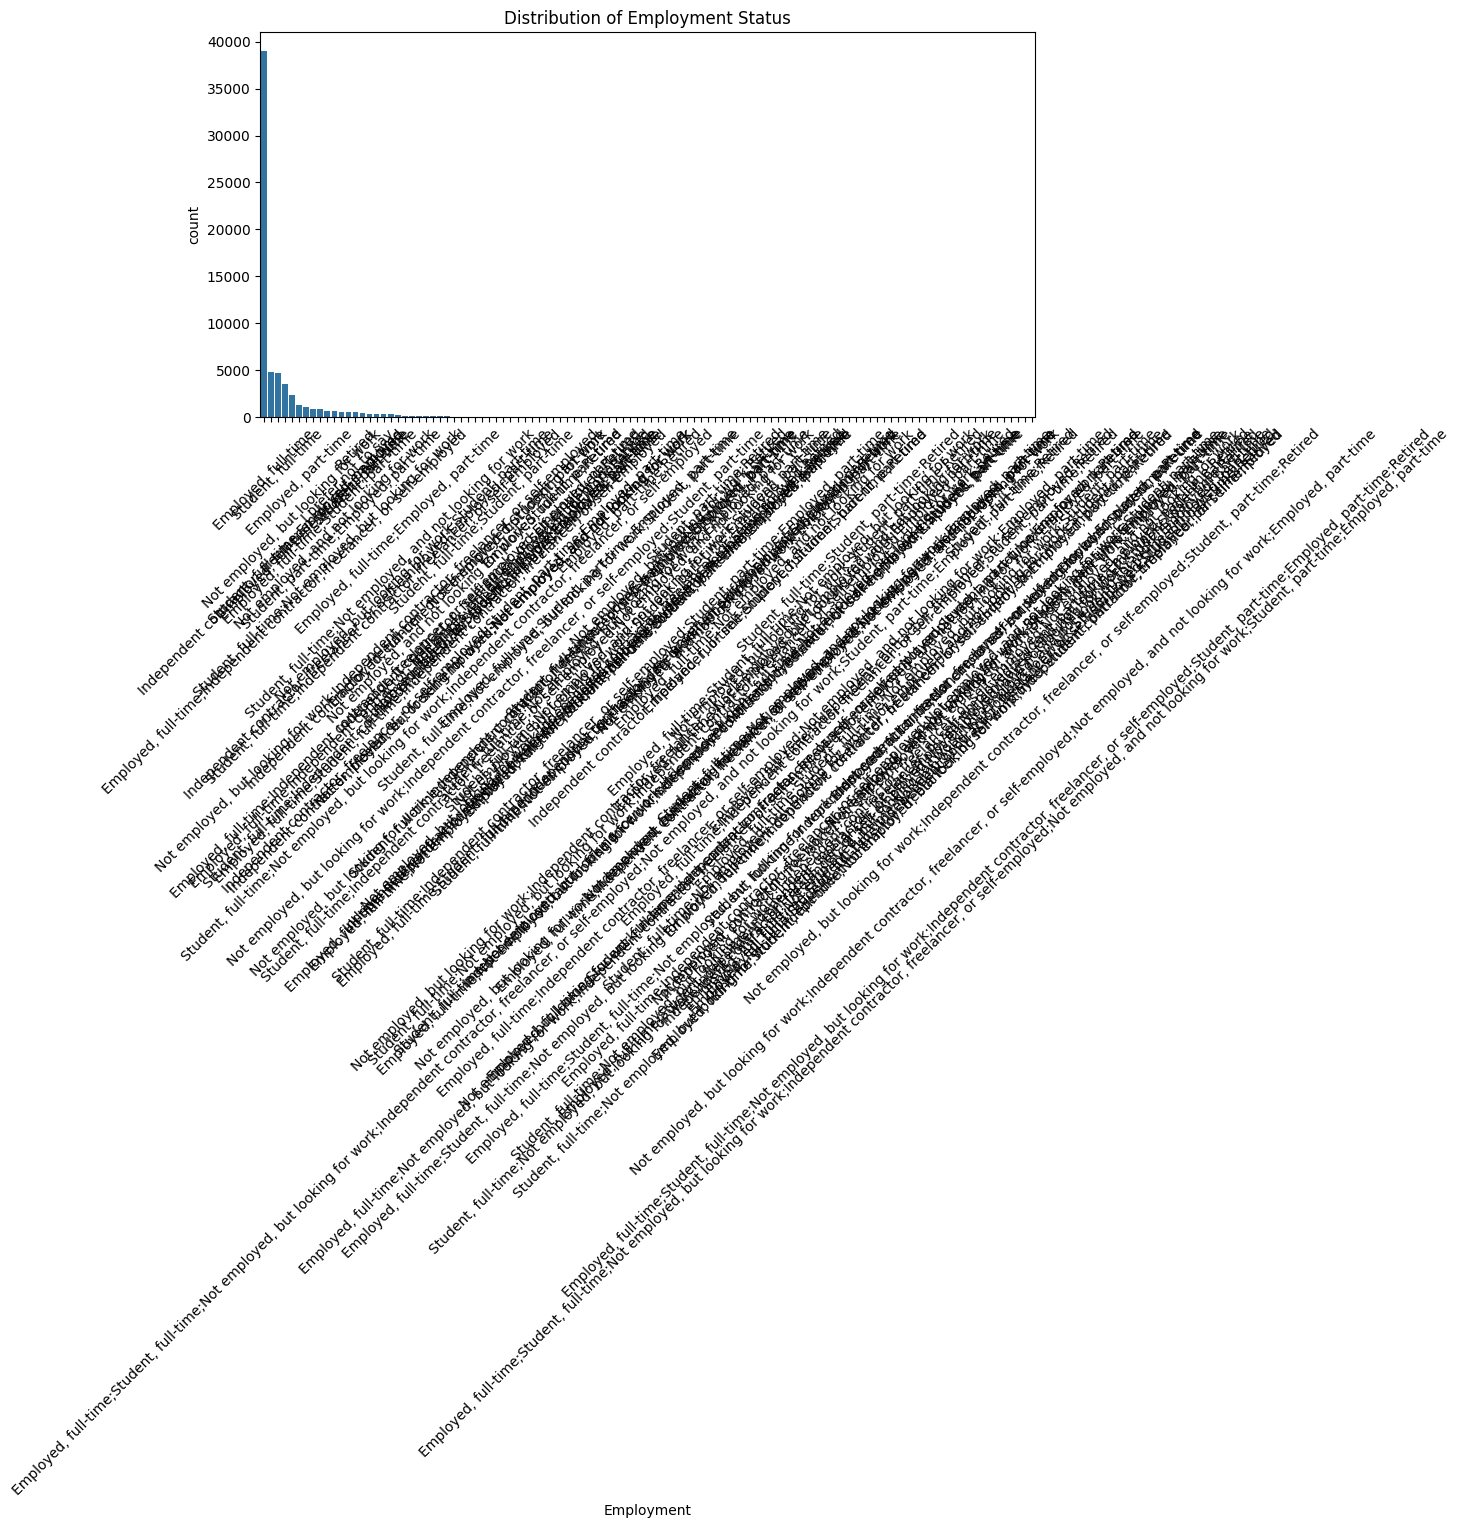

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Employment", order=df["Employment"].value_counts().index)
plt.title("Distribution of Employment Status")
plt.xticks(rotation=45)
plt.show()

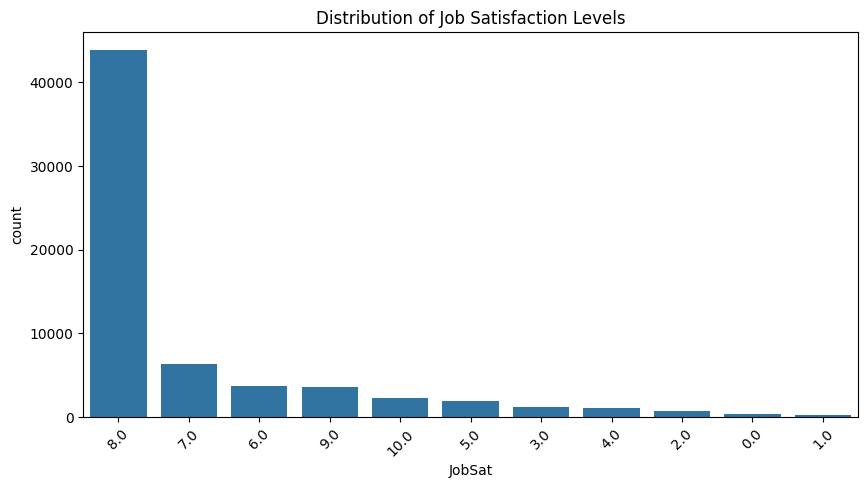

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="JobSat", order=df["JobSat"].value_counts().index)
plt.title("Distribution of Job Satisfaction Levels")
plt.xticks(rotation=45)
plt.show()

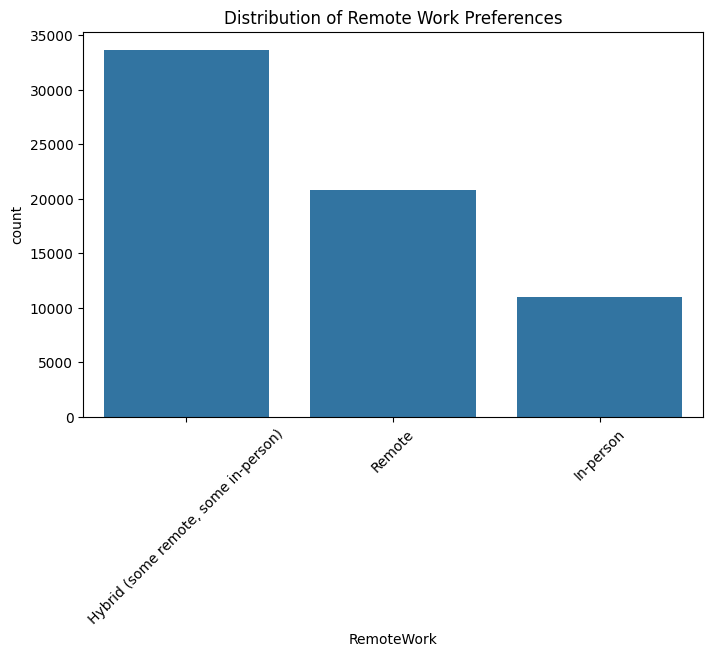

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="RemoteWork", order=df["RemoteWork"].value_counts().index)
plt.title("Distribution of Remote Work Preferences")
plt.xticks(rotation=45)
plt.show()


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [20]:
## Write your code here
# Clean the YearsCodePro column
def clean_years(value):
    if pd.isna(value):
        return None
    if value == "Less than 1 year":
        return 0
    if value == "More than 50 years":
        return 50
    try:
        return float(value)
    except:
        return None

df["YearsCodePro_clean"] = df["YearsCodePro"].apply(clean_years)


In [21]:
sat_mapping = {
    "Very dissatisfied": 1,
    "Slightly dissatisfied": 2,
    "Neutral": 3,
    "Slightly satisfied": 4,
    "Very satisfied": 5
}

df["JobSat_score"] = df["JobSat"].map(sat_mapping)

In [22]:
bins = [0, 5, 10, 20, 60]
labels = ["0–5", "5–10", "10–20", "20+"]

df["ExperienceRange"] = pd.cut(df["YearsCodePro_clean"], bins=bins, labels=labels, right=False)

In [23]:
df[["YearsCodePro_clean", "JobSat"]].dropna().shape

(51610, 2)

In [24]:
median_sat = df.groupby("ExperienceRange")["JobSat"].median()
median_sat

/tmp/ipython-input-2738400924.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_sat = df.groupby("ExperienceRange")["JobSat"].median()


,JobSat
ExperienceRange,
0–5,8.0
5–10,8.0
10–20,8.0
20+,8.0


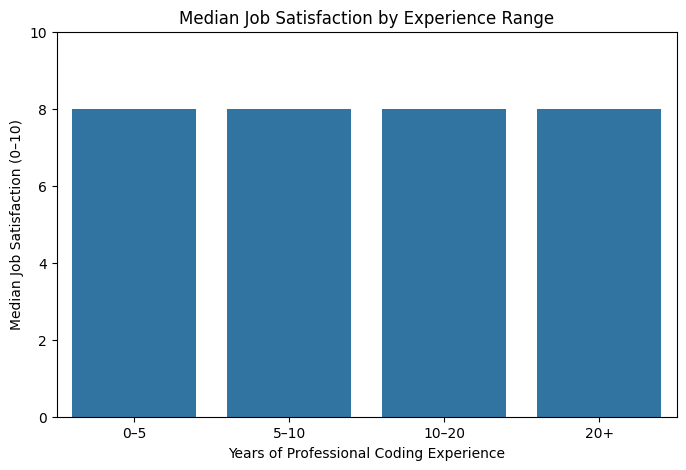

In [25]:
median_df = median_sat.reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=median_df, x="ExperienceRange", y="JobSat")
plt.title("Median Job Satisfaction by Experience Range")
plt.ylabel("Median Job Satisfaction (0–10)")
plt.xlabel("Years of Professional Coding Experience")
plt.ylim(0,10)
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


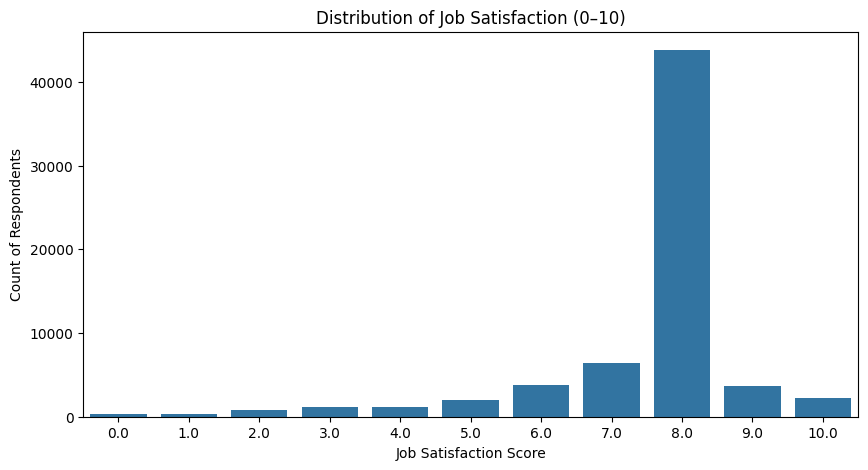

In [26]:
## Write your code here
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="JobSat", order=sorted(df["JobSat"].dropna().unique()))
plt.title("Distribution of Job Satisfaction (0–10)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Count of Respondents")
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


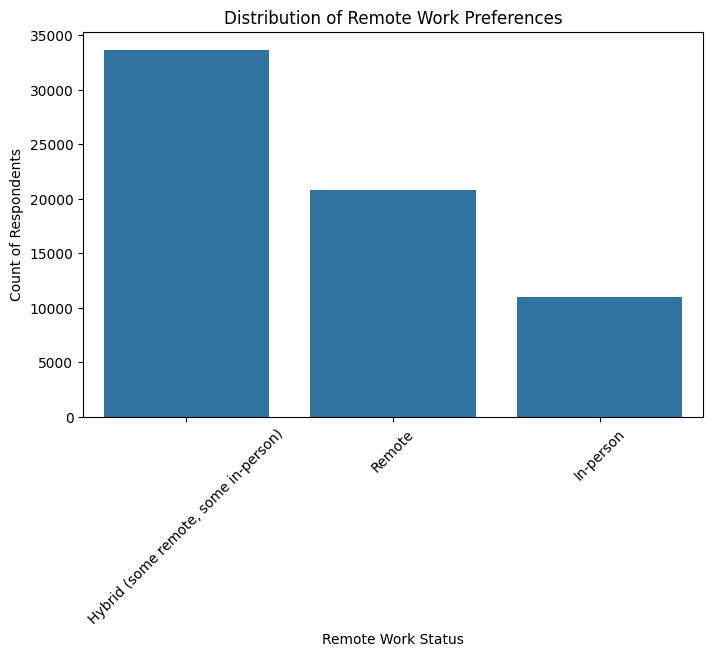

In [27]:
## Write your code here
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="RemoteWork", order=df["RemoteWork"].value_counts().index)
plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work Status")
plt.ylabel("Count of Respondents")
plt.xticks(rotation=45)
plt.show()


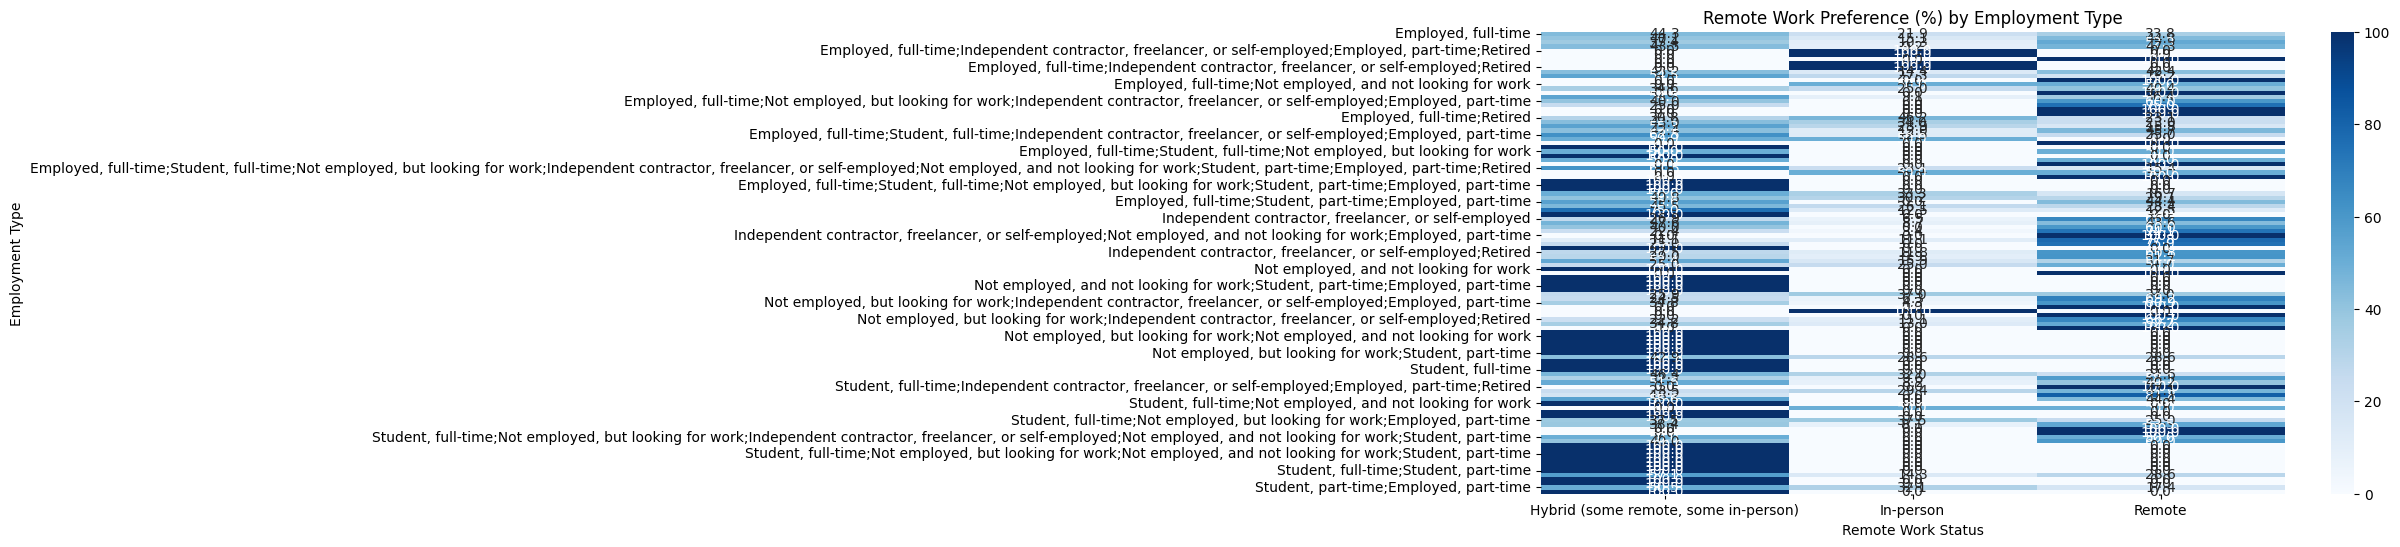

In [29]:
remote_by_employment = pd.crosstab(
    df["Employment"],
    df["RemoteWork"],
    normalize="index"
) * 100

remote_by_employment

plt.figure(figsize=(12,6))
sns.heatmap(remote_by_employment, annot=True, fmt=".1f", cmap="Blues")
plt.title("Remote Work Preference (%) by Employment Type")
plt.xlabel("Remote Work Status")
plt.ylabel("Employment Type")
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [30]:
## Write your code here
# Drop rows where languages are missing
lang_df = df.dropna(subset=["LanguageHaveWorkedWith"]).copy()

# Split the string into a list
lang_df["LanguageList"] = lang_df["LanguageHaveWorkedWith"].str.split(";")

# Explode into multiple rows (one language per row)
lang_exploded = lang_df.explode("LanguageList")

# Remove leading/trailing spaces
lang_exploded["LanguageList"] = lang_exploded["LanguageList"].str.strip()

lang_exploded.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,YearsCodePro_clean,JobSat_score,ExperienceRange,LanguageList
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,8.0,17.0,NaN,10–20,Bash/Shell (all shells)
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,

In [31]:
# Get the top 10 respondent countries
top_countries = df["Country"].value_counts().head(10).index

# Filter exploded data to these countries
heatmap_df = lang_exploded[lang_exploded["Country"].isin(top_countries)]
global_lang_counts = (
    lang_exploded["LanguageList"]
    .value_counts()
    .head(15)
)

global_lang_counts


,count
LanguageList,
JavaScript,37492
HTML/CSS,31816
Python,30719
SQL,30682
TypeScript,23150
Bash/Shell (all shells),20412
Java,18239
C#,16318
C++,13827


/tmp/ipython-input-2880718870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


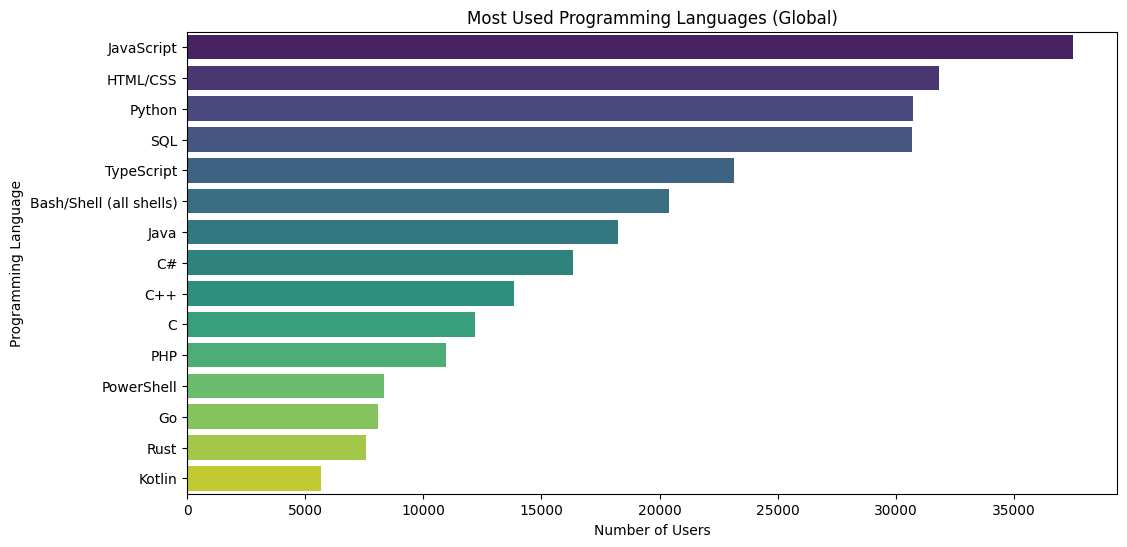

In [32]:
# Get the top 10 respondent countries
top_countries = df["Country"].value_counts().head(10).index

# Filter exploded data to these countries
heatmap_df = lang_exploded[lang_exploded["Country"].isin(top_countries)]
plt.figure(figsize=(12,6))
sns.barplot(
    y=global_lang_counts.index,
    x=global_lang_counts.values,
    palette="viridis"
)
plt.title("Most Used Programming Languages (Global)")
plt.xlabel("Number of Users")
plt.ylabel("Programming Language")
plt.show()


In [34]:
# Get the top 10 respondent countries
top_countries = df["Country"].value_counts().head(10).index

# Filter exploded data to these countries
heatmap_df = lang_exploded[lang_exploded["Country"].isin(top_countries)]


In [35]:
language_country_table = pd.crosstab(
    heatmap_df["LanguageList"],
    heatmap_df["Country"],
    normalize="columns"
) * 100

# Limit to top 20 languages
language_country_table = language_country_table.head(20)


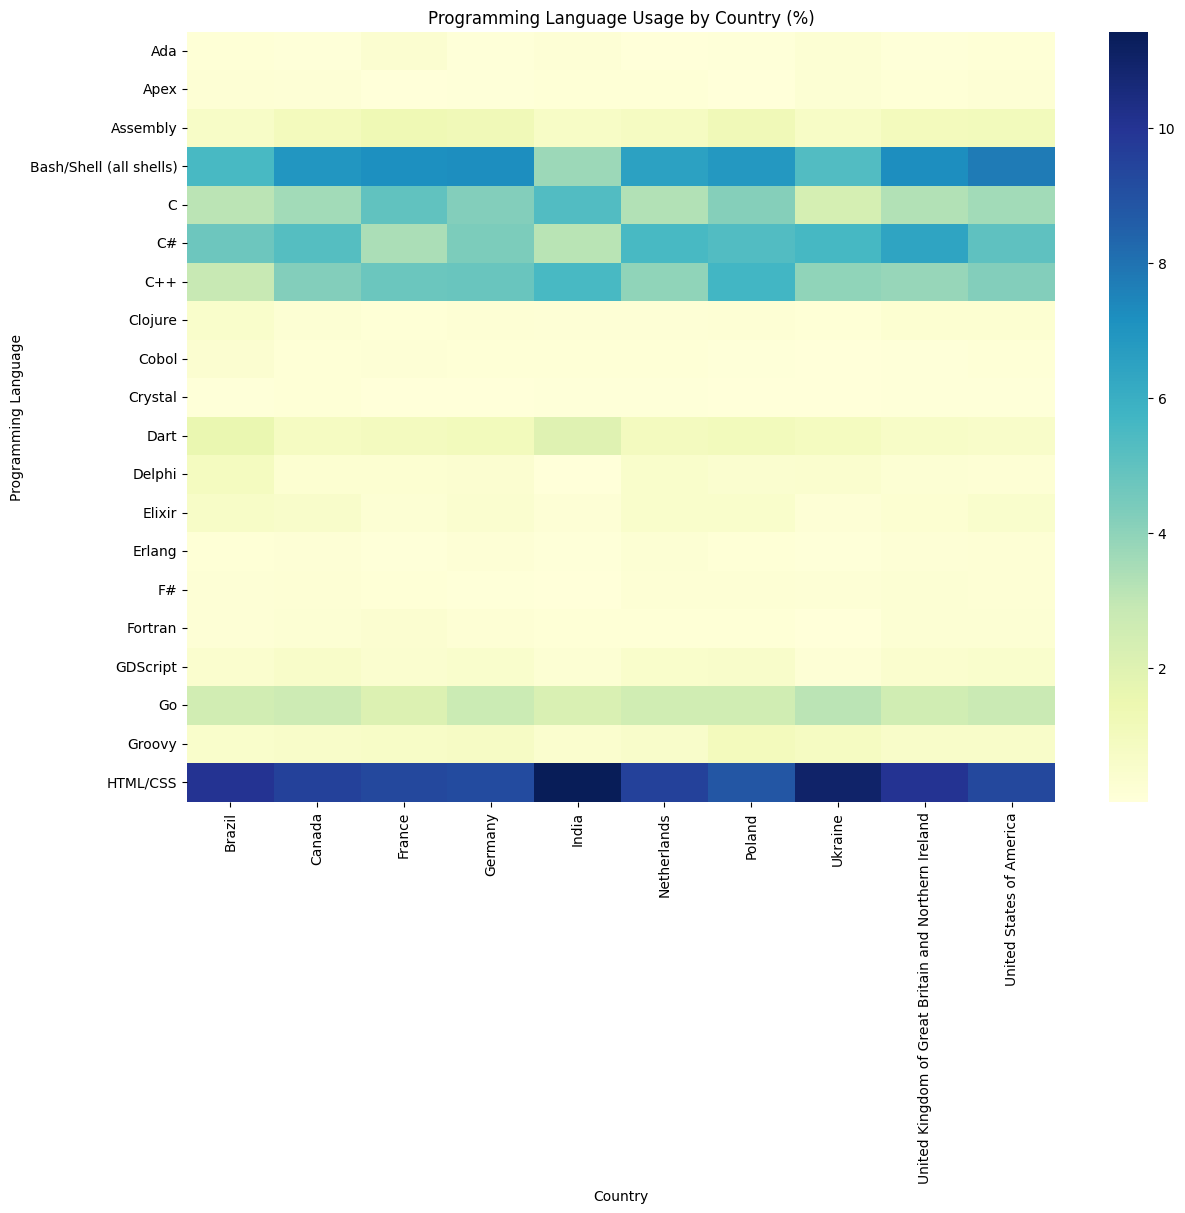

In [36]:
plt.figure(figsize=(14,10))
sns.heatmap(language_country_table, cmap="YlGnBu", annot=False)
plt.title("Programming Language Usage by Country (%)")
plt.xlabel("Country")
plt.ylabel("Programming Language")
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [38]:
## Write your code here
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly', 'JobSat', 'YearsCodePro_clean',
       'JobSat_score', 'ExperienceRange'],
      dtype='object', length=117)

In [39]:
df["JobSatPoints_1"].isna().sum()


np.int64(36113)

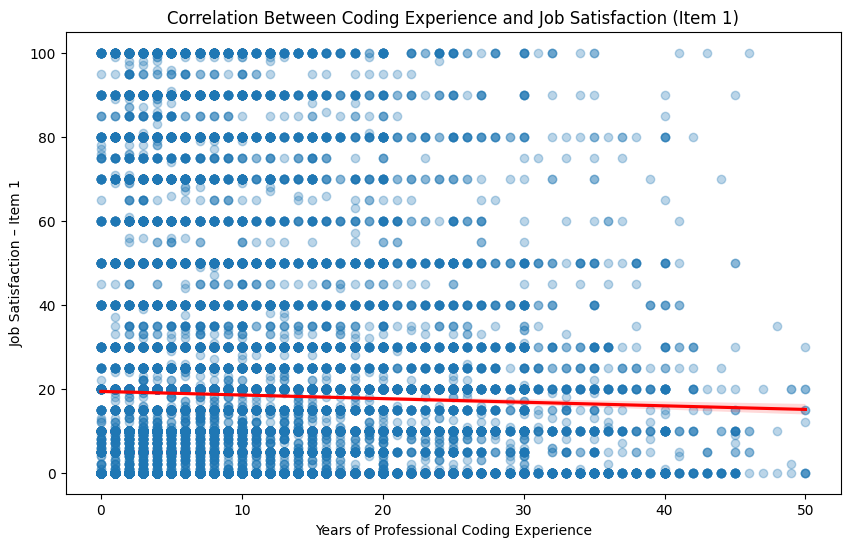

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x="YearsCodePro_clean",
    y="JobSatPoints_1",
    scatter_kws={"alpha": 0.3},      # makes points translucent
    line_kws={"color": "red"}        # trend line
)
plt.title("Correlation Between Coding Experience and Job Satisfaction (Item 1)")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction – Item 1")
plt.show()


In [41]:
df[["YearsCodePro_clean", "JobSatPoints_1"]].corr()

,YearsCodePro_clean,JobSatPoints_1
YearsCodePro_clean,1.000000,-0.028244
JobSatPoints_1,-0.028244,1.000000


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [42]:
## Write your code here
# Count how many respondents in each education level
ed_counts = df["EdLevel"].value_counts()
ed_counts


,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24942
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15557
Some college/university study without earning a degree,7651
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",5793
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2970
"Associate degree (A.A., A.S., etc.)",1793
Primary/elementary school,1146
Something else,932


In [43]:
# Define threshold
threshold = 20

# Identify categories to keep
valid_ed_levels = ed_counts[ed_counts >= threshold].index

# Identify small categories (for reporting)
small_ed_levels = ed_counts[ed_counts < threshold]
small_ed_levels


,count
EdLevel,


In [44]:
df_filtered = df[df["EdLevel"].isin(valid_ed_levels)].copy()


In [45]:
education_employment_pct = pd.crosstab(
    df_filtered["EdLevel"],
    df_filtered["Employment"],
    normalize="index"
) * 100


In [46]:
education_employment_pct = education_employment_pct.loc[ed_counts[valid_ed_levels].index]


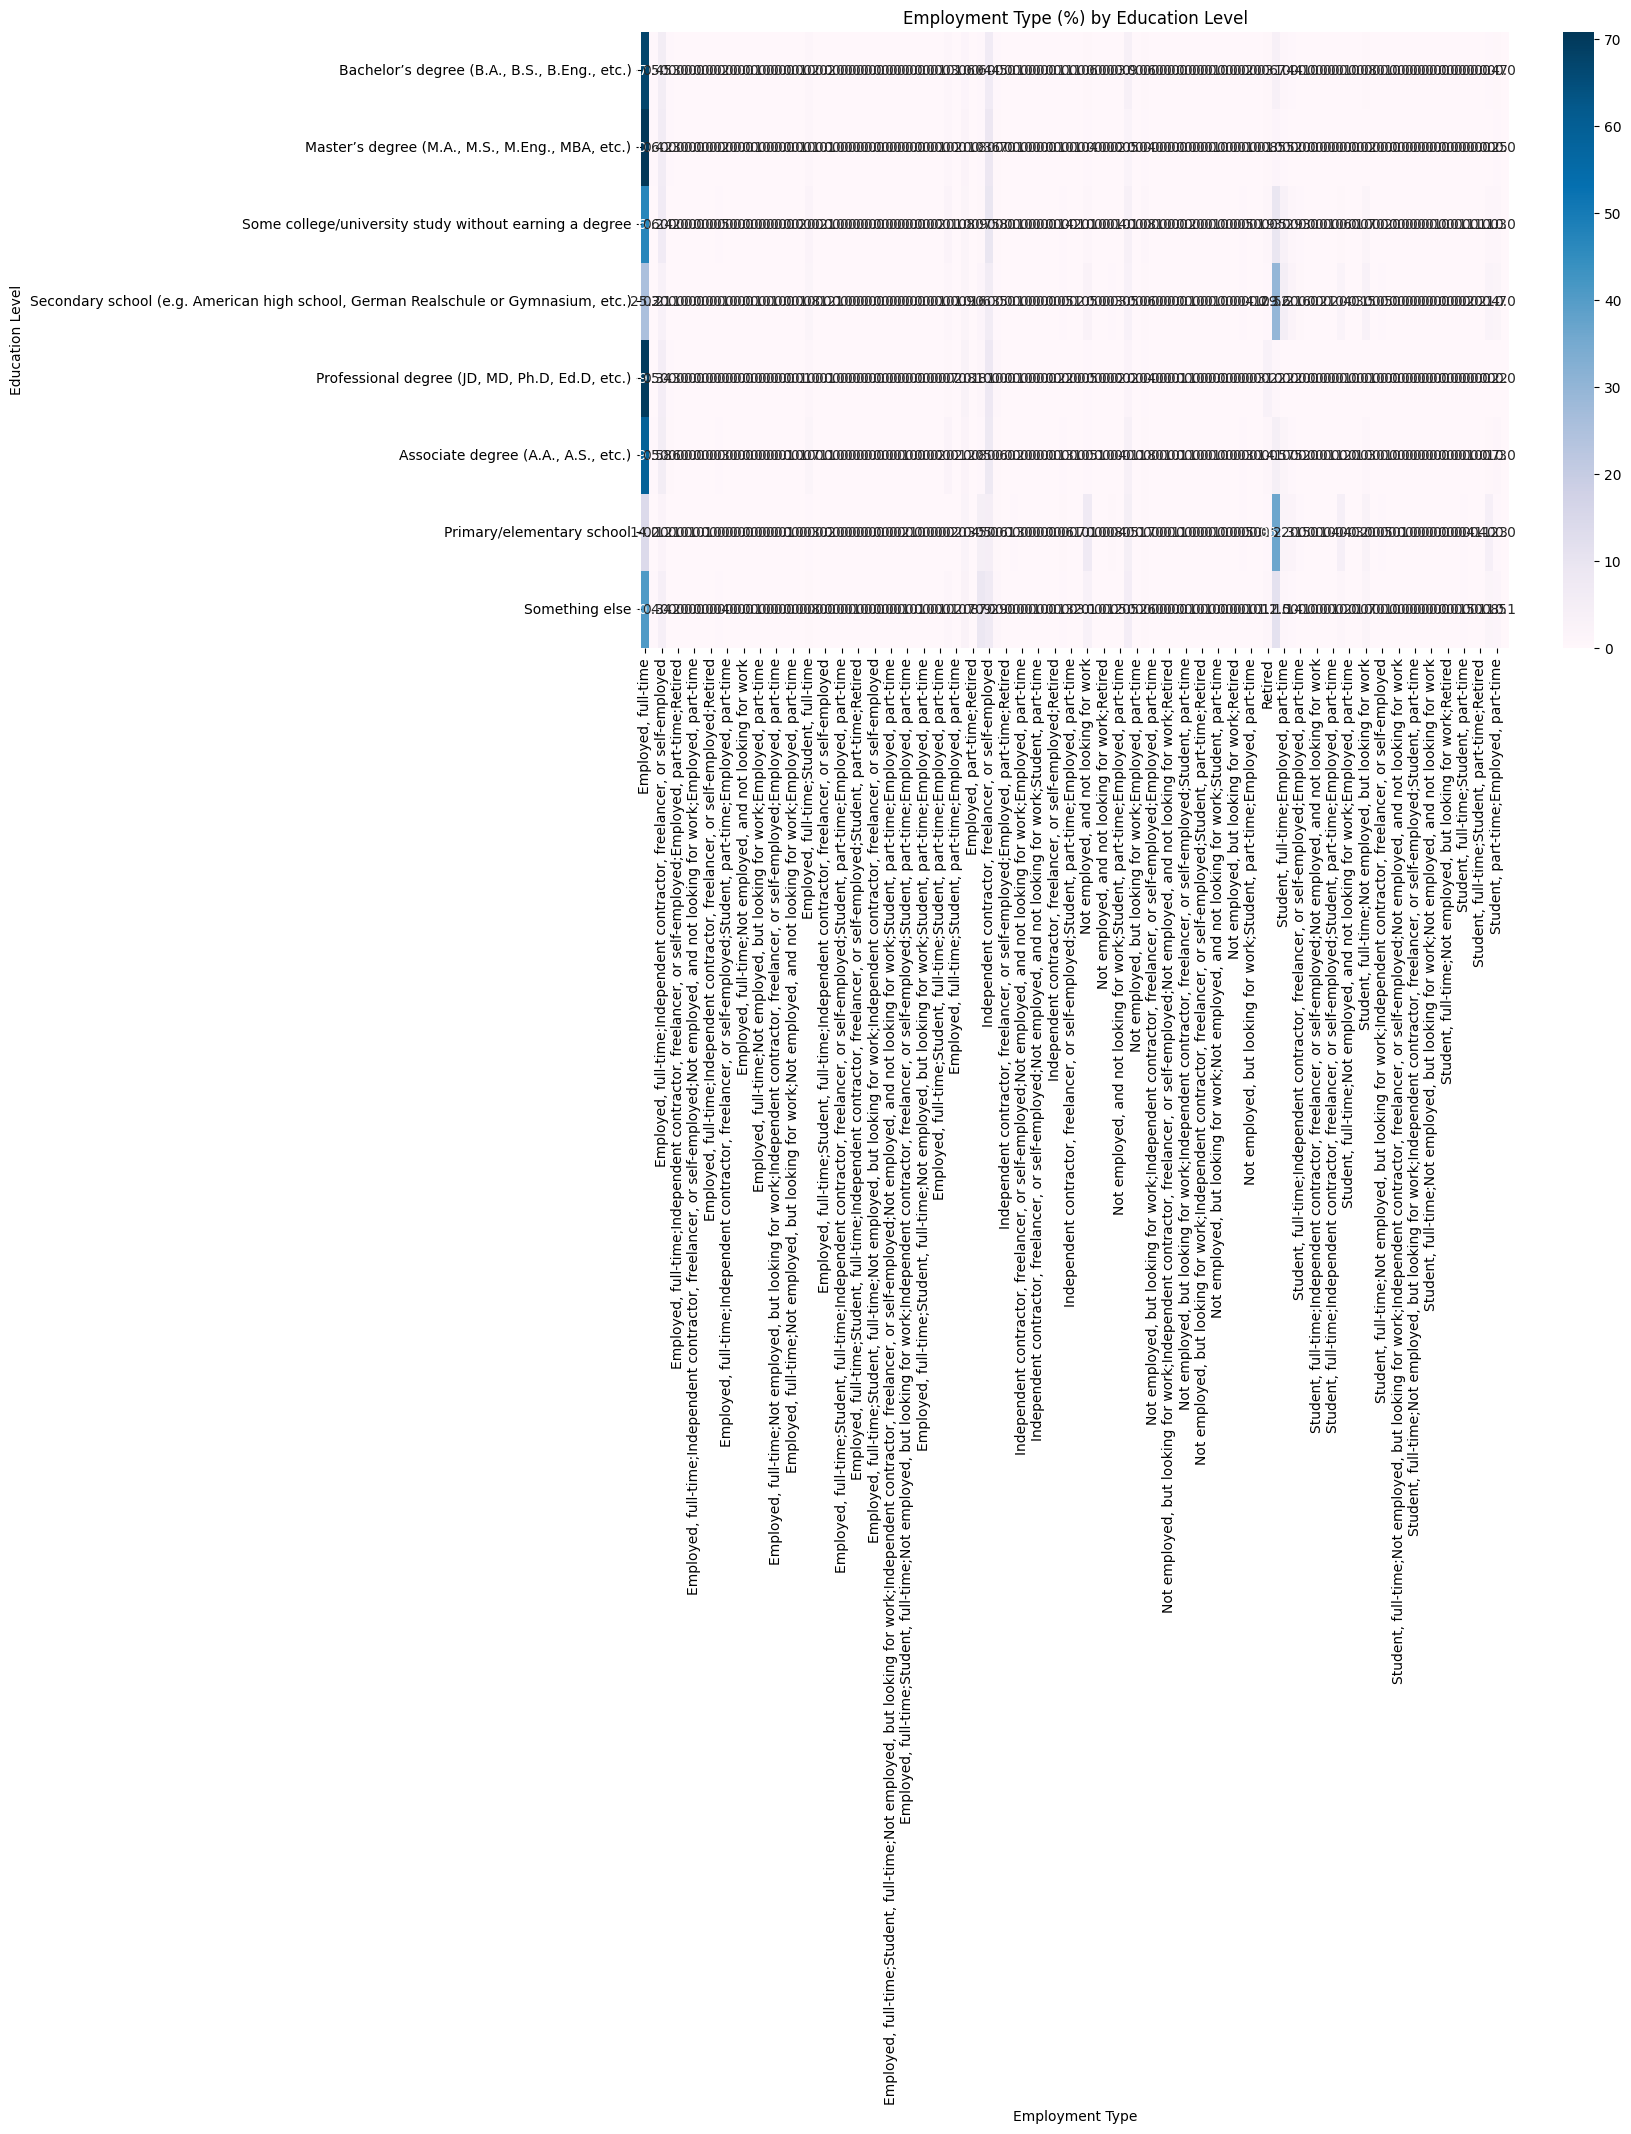

In [47]:
plt.figure(figsize=(14,8))
sns.heatmap(
    education_employment_pct,
    cmap="PuBu",
    annot=True,
    fmt=".1f"
)
plt.title("Employment Type (%) by Education Level")
plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.show()


In [48]:
print("Excluded EdLevel categories due to low sample size (<20 responses):")
small_ed_levels


Excluded EdLevel categories due to low sample size (<20 responses):


,count
EdLevel,


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
